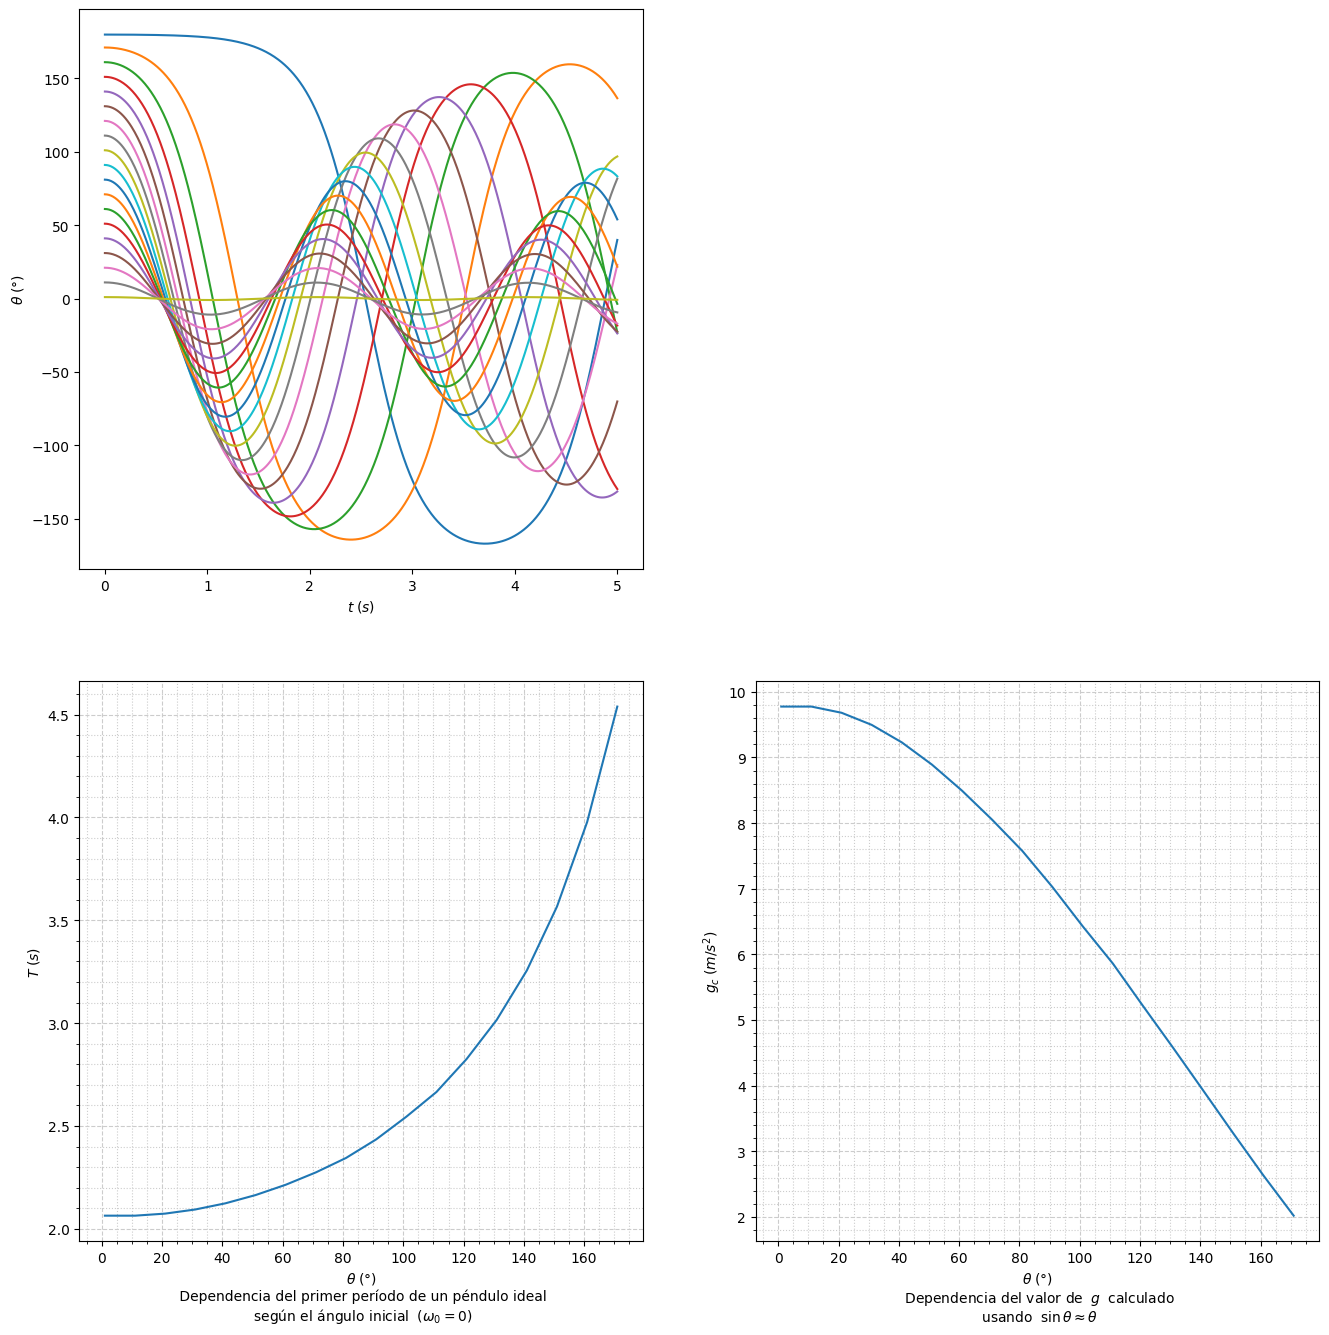

In [1]:
import numpy as np
from scipy import integrate
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

"""
Debemos escribir la ecuación diferencial como
dy/dt = f(t,y,c), (de primer orden)
donde t es el termino independiente (de una dimension)
y(t):{ t -> (y0(t), y1(t),...,yn(t)) }
c, un arreglo de constantes

y'' + μy' + (g/L)*sin(y) = 0
Escribimos la e.d. de segundo orden como un sistema
de e.d. de primer órden:
sea y[0] = y
    d/dt(y[0]) = y[1]
    d/dt(y[1]) = y[2] -> y[2] = -(g/L)*sin(y[0])
"""

lp = 1.055

def grav(L,T):
    return 4*np.pi**2*L/T**2

def pend(t,y):
    # tengo que devolver un arreglo [d/dt(y[0]),d/dt(y[1]),...]
    g = 9.807
    L = lp
    theta = y[0]
    dtheta = y[1]
    ddtheta = -(g/L)*np.sin(theta) -0.01*dtheta 
    dydt = [ dtheta, ddtheta ]
    return dydt

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(2,2,1)
theta_var = np.empty(0)
T_var = np.empty(0)
t_span = [0, 5]
t = np.linspace(*t_span,500)
for theta0 in range(181,-1,-10):
    if theta0 >= 180:
        theta0 = 179.8
    # y0 = [ y0(t), y0'(t) ]
    y0 = [ np.radians(theta0), 0 ]  # 15 grados, velocidad 0
    sol = integrate.solve_ivp(pend, t_span, y0, method='RK45', dense_output=True, t_eval=t, rtol=1e-8) # DOP853
    #plt.plot(sol.t, sol.y[0])
    Y = np.degrees(sol.sol(t)[0])
    peaks = t[find_peaks(Y)[0]]
    if peaks.any():
        theta_var = np.append(theta_var, theta0)
        T_var = np.append(T_var, peaks[0])

    ax.plot(t,Y) #solve_ivp

ax.set_xlabel('$t\;(s)$')
ax.set_ylabel('$\\theta\;(°)$')

ax = fig.add_subplot(2,2,3)
ax.plot(theta_var, T_var)
ax.set_xlabel('$\\theta\;(°)$\n Dependencia del primer período de un péndulo ideal\n según el ángulo inicial $\;(\omega_0=0)$')
ax.set_ylabel('$T\;(s)$')
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax = fig.add_subplot(2,2,4)
g_var = grav(lp,T_var)
ax.plot(theta_var, g_var)
ax.set_xlabel('$\\theta\;(°)$\n Dependencia del valor de $\;g\;$ calculado\n usando $\;\sin\\theta\\approx\\theta$')
ax.set_ylabel('$g_c\;(m/s^2)$')
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':');